<a href="https://colab.research.google.com/github/me2527/VideoGamesSalesAnalysis/blob/main/2020_08_16_AditiDwivedi_AT_CapstoneProject11_VideoGameSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 11: Video Game Sales Analysis - Grouping & Aggregation

### Context

Video games creation is essentially a software development process.  A group of individuals or a company create a video game with the aim of massive profits. Generally, publishers such as EA Sports, Atari, Rockstar Games etc. fund the game development process. However, for publishers, it is very important to estimate the cost of development of a video game. Additionally, they also have to allocate the right amount of budget. If the budget is too little, the quality of a game will get compromised whereas if the budget is too much, their profit margin will reduce. Most of the commercial games do not generate adequate profit. 

A video game is an interactive visual story. A new game must provide novelty and must be a product of innovation. Otherwise, it may turn out repetitive and boring. Many individual groups of game developers shut down their development process and exit the market because they cannot find a publisher or they can't fund the development by themselves as the initial capital investment requirement is humongous. Nevertheless, once the companies become financially stable by making sufficient profits, they may expand to develop newer games or sequels to the initial ones such as FIFA, Call of Duty, Age of Empires etc.

An average development budget for a multiplatform (PC, PS, Xbox etc.) game is US \$18 to 28 million, with high-profile games often exceeding US $40 million.



---

### Problem Statement

Imagine that you work for one of the world's biggest tech giants as a data analyst. The company intends to venture into the video game development business by either creating their own video games and gaming platforms or by funding a group of individual game developers.

As a part of market research, your CEO wants to come up with a business strategy to enable your company to enter into the video game development business. However, in the best interest of companies financial investment in this project, it is important to know whether there are enough buyers, in the long run, do the number of buyers increase so that they stay invested in this project.

Your CEO would like to know what kind of games are most popular in terms of the most units sold, what are the most commonly used gaming platforms such as PS4, Xbox, PC etc.

---

### Dataset Description

You are provided with a video games sales dataset. It consists of the following features:

1. `Rank` - Rank based on the number of units sold of a game. The most sold game is ranked 1.

2. `Name` - The name of a video game.

3. `Platform` - The platform (PC, PS4, XBox etc.) for which a game is released.

4. `Year` - The release year of a video game.

5. `Genre` - The genre of a video game.

6. `Publisher` - The publisher of a video game.

7. `NA_Sales` - Approximately, the total number of units sold (in million) of a video game in North America.

8. `EU_Sales` - Approximately, the total number of units sold (in million) of a video game in Europe.

9. `JP_Sales` - Approximately, the total number of units sold (in million) of a video game in Japan.

10. `Other_Sales` - Approximately, the total number of units sold (in million) of a video game in the rest of the world.

11. `Global_Sales` - Approximately, the total number of units sold (in million) of a video game all over the world.

Here's a link to the dataset:

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/video-games-sales/video-game-sales.csv

---

### Things To Do

- The `Year` and `Publisher` columns contain few missing values. Treat them accordingly.

- Convert the values contained in the `Year` column into integer values.

- Find out:

  1. The trend of growth in the number of total units sold across the given regions and the world. Also create year-wise line plots for the total number of units sold across different regions and the world.
  
  2. Top 10 most sold genres of video games but at least 100 million units sold globally. Also create genre-wise line plots for the total number of units sold across different regions and the world.

  3. Top 10 best publishers of video games but at least 100 million units sold globally. 
  
  4. Top 10 most commonly used gaming platform but at least 100 million units sold globally.

---

#### 1. Import Modules & Load Data

In [ ]:
# Import the modules required.
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset.
df=pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/video-games-sales/video-game-sales.csv")

In [ ]:
# Get the dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


---

#### 2. Treat Null Values

In [ ]:
# Check for the null values in all the columns.
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Remove the rows/columns containing the null values.
df=df[df['Year'].isna()==False]
df=df[df['Publisher'].isna()==False]

In [ ]:
# Convert the data-type of the year values into integer values.
df["Year"]=df["Year"].astype('int')
df['Year'].dtype

dtype('int64')

---

#### 3. Yearly Total Units Sold

In [ ]:
# Find out the total number of units sold yearly across different regions and the world.
group_by_year=df.groupby(by='Year')
func_dict_of_aggregate={col: "sum" for col in df.columns[6:11]}
total_sales_yearly=group_by_year.agg(func=func_dict_of_aggregate)
total_sales_yearly
#for col in df.columns[6:11]:
#  var=group_by_year.sum()
#var

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.77
1982,26.92,1.65,0.00,0.31,28.86
1983,7.76,0.80,8.10,0.14,16.79
1984,33.28,2.10,14.27,0.70,50.36
1985,33.73,4.74,14.56,0.92,53.94
1986,12.50,2.84,19.81,1.93,37.07
1987,8.46,1.41,11.63,0.20,21.74
1988,23.87,6.59,15.76,0.99,47.22


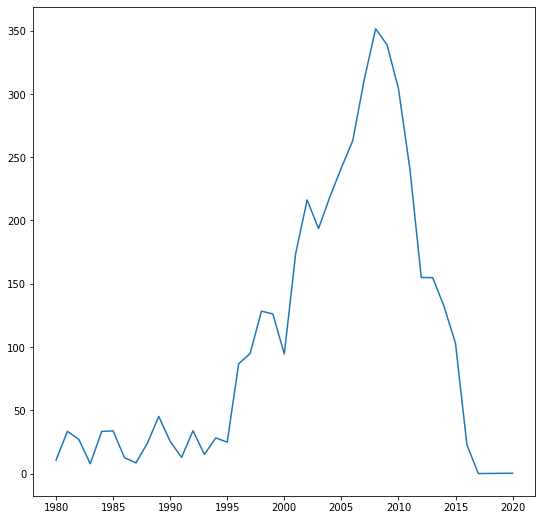

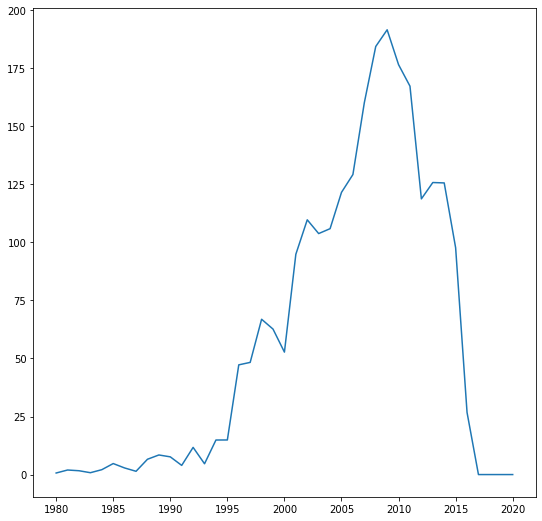

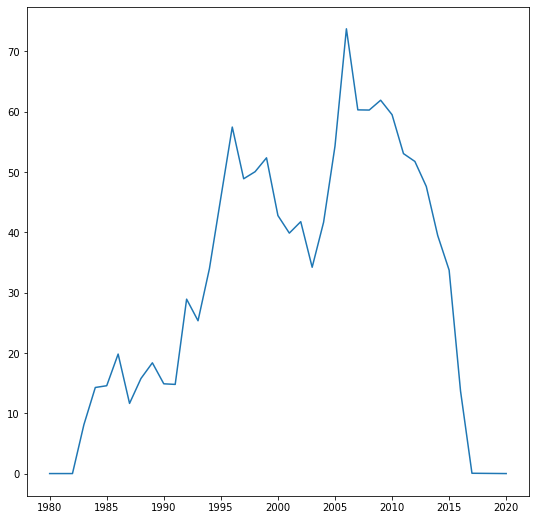

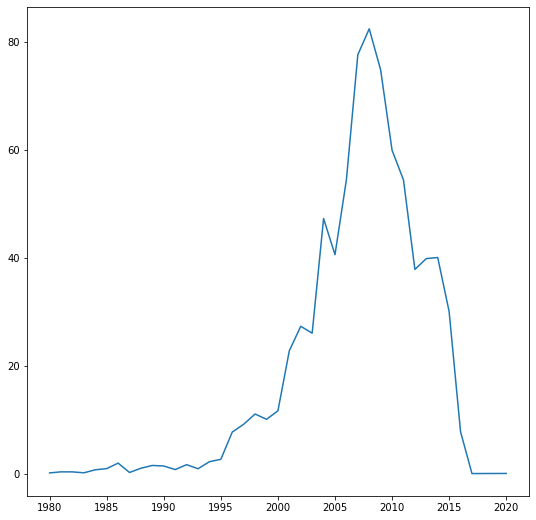

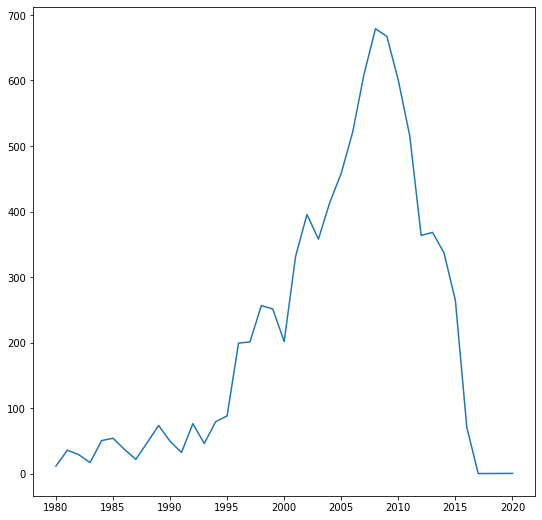

In [ ]:
# Create the line plots for the total number of units sold yearly across different regions and the world.
for i in total_sales_yearly.columns:
  plt.figure(figsize=(9,9))
  plt.plot(total_sales_yearly.index,total_sales_yearly[i])
  plt.show()

**Q:** In which year, the most number of games were sold globally and how many?

**A:** In *2008*, `678.9` million number of games were sold globally.

In [ ]:
# In which year, the most number of games were sold globally and how many?
total_sales_yearly[total_sales_yearly['Global_Sales']==total_sales_yearly['Global_Sales'].max()]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
2008,351.44,184.4,60.26,82.39,678.9


---

#### 4. Genre-wise Total Units Sold

In [ ]:
# Find out the genre-wise total number of units sold across different regions and the world.
genre_group=df.groupby(by='Genre')
total_sales_of_genre=genre_group.agg(func=func_dict_of_aggregate)
total_sales_of_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Adventure,101.93,63.74,51.99,16.70,234.59
Fighting,220.74,100.00,87.15,36.19,444.05
Misc,396.92,211.77,106.67,73.92,789.87
Platform,445.99,200.65,130.65,51.51,829.13
Puzzle,122.01,50.52,56.68,12.47,242.21
Racing,356.93,236.31,56.61,76.68,726.76
Role-Playing,326.50,187.57,350.29,59.38,923.83
Shooter,575.16,310.45,38.18,101.90,1026.20


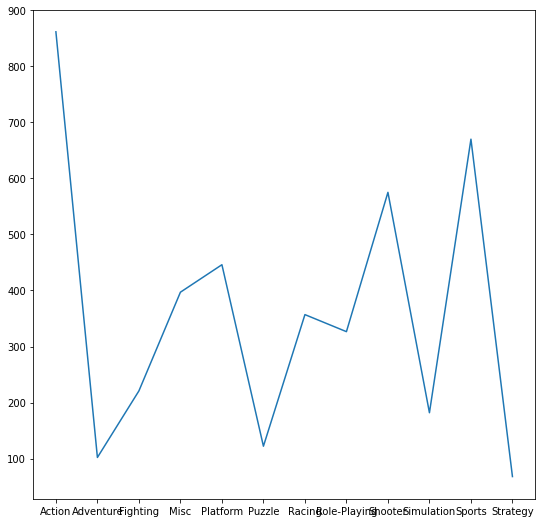

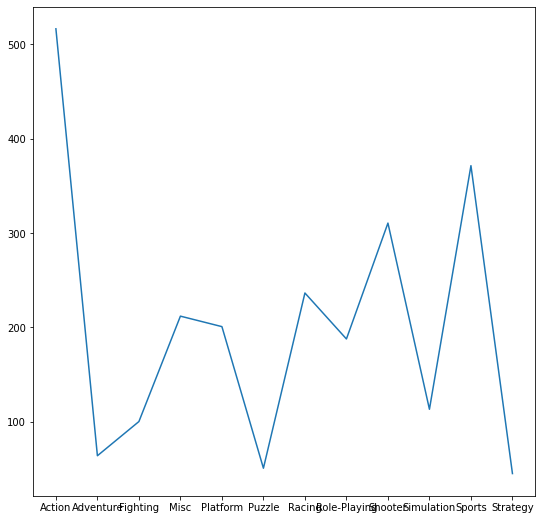

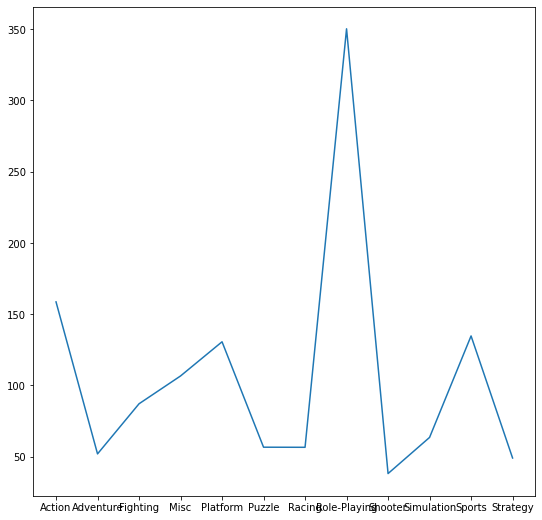

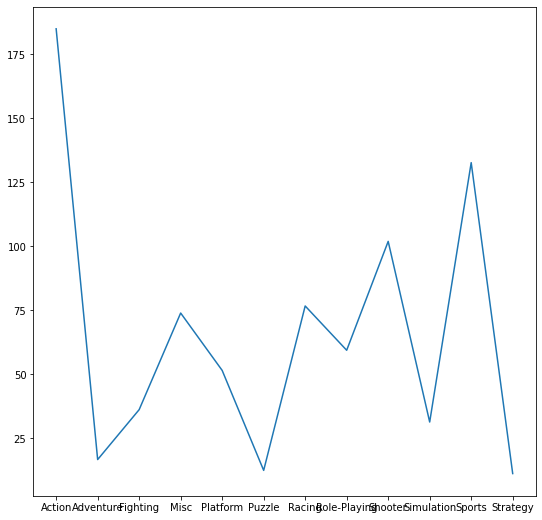

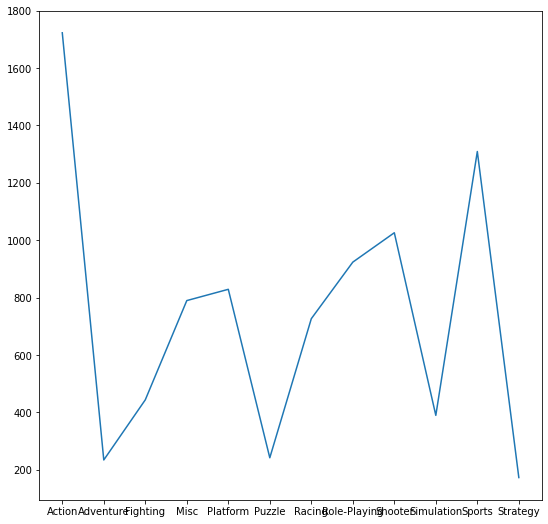

In [ ]:
# Create line plots for genre-wise total number of units sold across different regions and the world.
for j in total_sales_of_genre.columns:
  plt.figure(figsize=(9,9))
  plt.plot(total_sales_of_genre.index,total_sales_of_genre[j])
  plt.show()

**Q:** What genre of video game is most popular in Japan in terms of the total number of units sold? Also, provide the total number of units sold in Japan for that genre.

**A:** **ROLE-PLAYING** genre of video game is most popular in Japan in terms of the total of number of unit sold. And the total number of units sold in Japan for this genres is 350.29 million.


In [ ]:
# What genre of video game is most popular in Japan in terms of the total number of units sold?
total_sales_of_genre[total_sales_of_genre['JP_Sales']==total_sales_of_genre['JP_Sales'].max()]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Role-Playing,326.5,187.57,350.29,59.38,923.83


In [ ]:
# Genre-wise total number of units sold across different regions and the world in descending order.
genre_group = df.groupby(by='Genre')
total_sales_of_genre = genre_group.agg(func=func_dict_of_aggregate).sort_values(by='Global_Sales', ascending=False)
total_sales_of_genre.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Sports,670.09,371.34,134.76,132.65,1309.24
Shooter,575.16,310.45,38.18,101.90,1026.20
Role-Playing,326.50,187.57,350.29,59.38,923.83
Platform,445.99,200.65,130.65,51.51,829.13
Misc,396.92,211.77,106.67,73.92,789.87
Racing,356.93,236.31,56.61,76.68,726.76
Fighting,220.74,100.00,87.15,36.19,444.05
Simulation,181.78,113.02,63.54,31.36,389.98


**Q:** Which genre of the video games sells the most globally and how much?

**A:** **Action game** genre video games sells m=the most globally and approximately 1.722 billion.

---

#### 5. Publisher-wise Total Units Sold

In [ ]:
# Find out the publisher-wise total number of units sold across different regions and the world in the descending order.
publisher_grp=df.groupby(by='Publisher')
total_sales_of_publisher=publisher_grp.agg(func=func_dict_of_aggregate).sort_values(by='Global_Sales',ascending=False)
total_sales_of_publisher.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.81,163.03,7.33,50.16,473.54
Take-Two Interactive,220.47,117.95,5.83,55.20,399.30
THQ,208.60,94.60,5.01,32.11,340.44
Konami Digital Entertainment,88.91,68.62,90.93,29.91,278.56
Sega,108.78,81.41,56.19,24.30,270.70


**Q:** Which video game publisher sells the most number of units globally and how much?
 
**A:** **`NINTENDO`** video game publisher sells the most number of units globally and sells number is equal to 1.784 billion.

---

#### 6. Platform-wise Total Units Sold

In [ ]:
# Find out the platform-wise the total number of units sold across different regions and the world in the descending order.
platform_group=df.groupby(by='Platform')
total_sales_platform=platform_group.agg(func=func_dict_of_aggregate).sort_values(by='Global_Sales', ascending=False)
total_sales_platform.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.46
X360,594.33,278.00,12.30,84.67,969.60
PS3,388.90,340.47,79.21,140.81,949.35
Wii,497.37,264.35,68.28,79.20,909.81
DS,388.53,194.05,175.02,60.29,818.91
PS,334.71,212.38,139.78,40.69,727.39
GBA,178.43,72.49,46.56,7.51,305.62
PSP,107.09,67.16,75.89,41.52,291.71
PS4,96.80,123.70,14.30,43.36,278.10


**Q:** For which platform of a video game, the most number of units are sold globally and how much?

**A:** **`1.234 billion of PS2`** platform of a video game , mostly sold globally.

---

### How To Solve & Submit The Project

Follow the steps described below to solve the project and then submit it.

1. Click on the link provided below to open the Colab file for this project.
   
   https://colab.research.google.com/drive/1nXtn3CB3jwX8TiBuAPLLU9JiuM3X_w8z

2. Create the duplicate copy of the Colab file. Here are the steps to create the duplicate copy:

    - Click on the **File** menu. A new drop-down list will appear.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

    - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

     - After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project11** format. 

3. Now, write your code in the prescribed code cells.

4. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/2_share_button.png' width=500>

5. In the dialog box, click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-1/1_copy_link.png' width=500>

6. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project11**) of the notebook will get copied which you can paste in the submission box on the WhiteHat Jr project submission interface.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-1/2_copy_link_confirmation.png' width=500>

---